#Dataset

Bock,R.. (2007). MAGIC Gamma Telescope. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols = ["flength" , "fwidth" , "fsize" , "fConc" , "fConc1" , "fAsym" , "fM3long" , "fM3trans" , "fAlpha" , "fDist" , "class" ]
df =pd.read_csv("magic04.data" , names = cols )
df.head()

flength    fwidth   fsize   fConc  fConc1     fAsym  fM3long  fM3trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df["class"] = (df['class'] == "g").astype(int)


In [ ]:
df.head()

flength    fwidth   fsize   fConc  fConc1     fAsym  fM3long  fM3trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

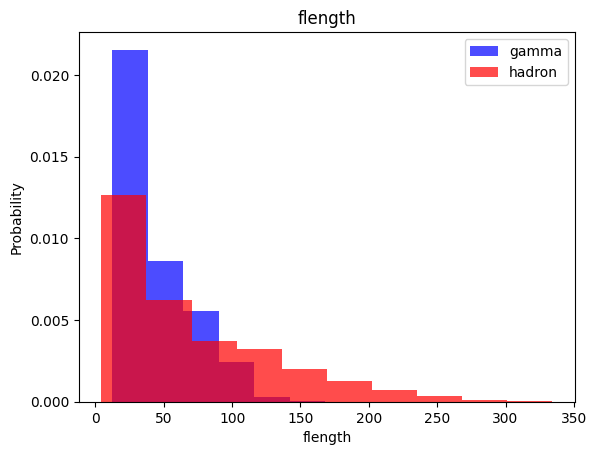

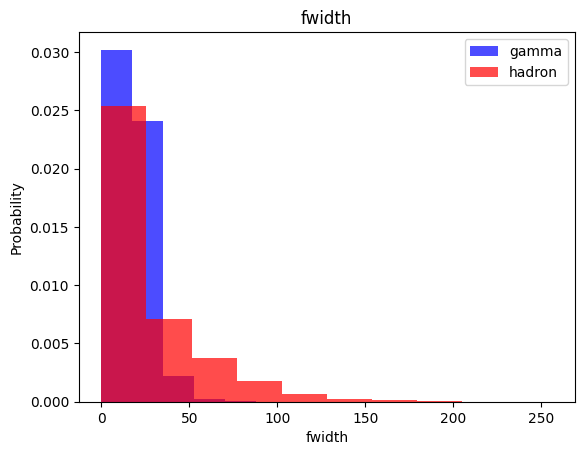

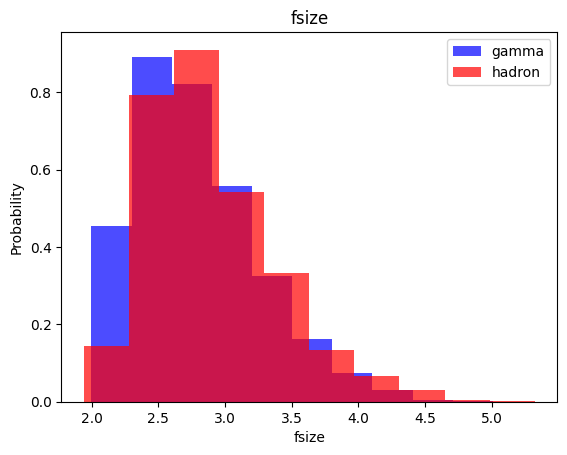

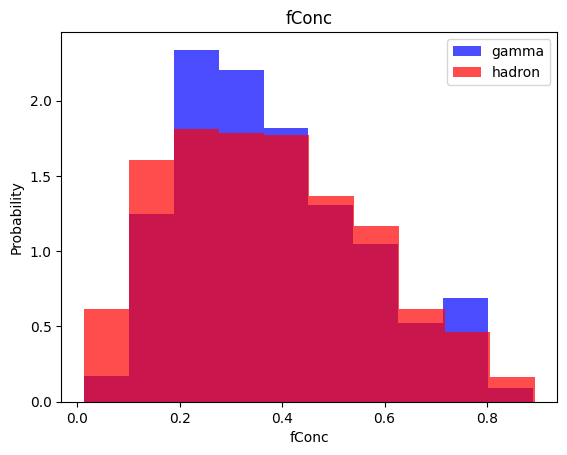

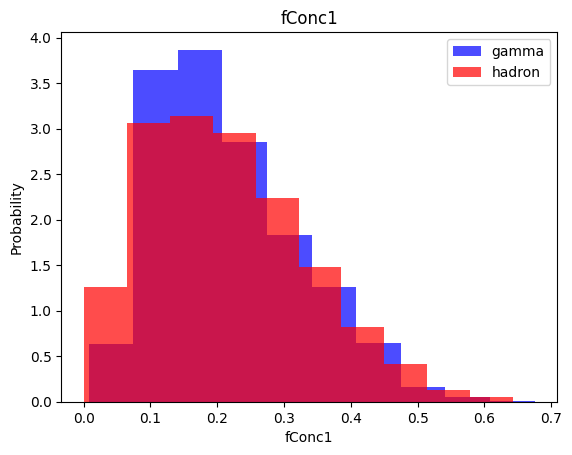

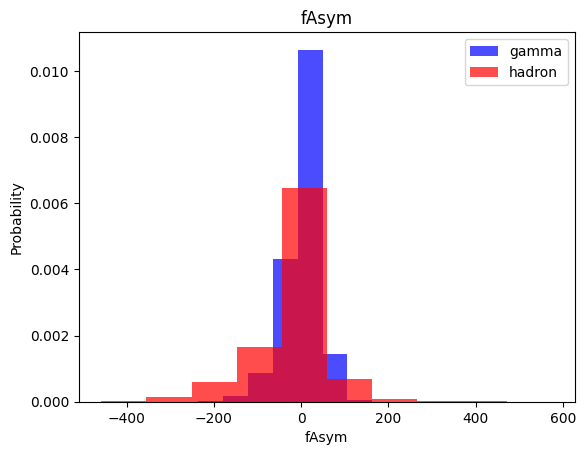

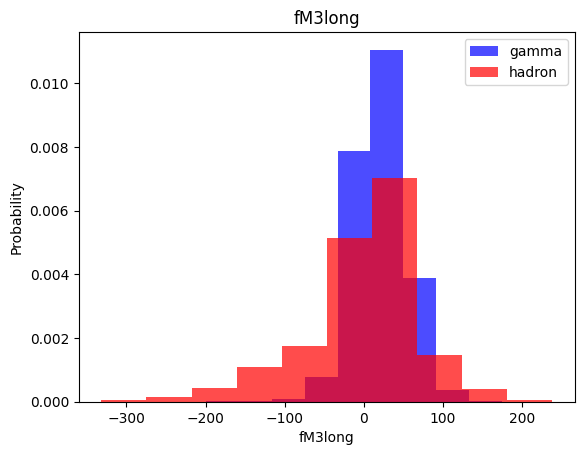

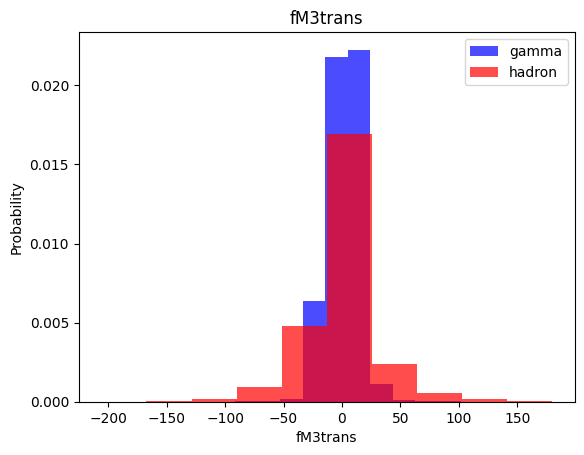

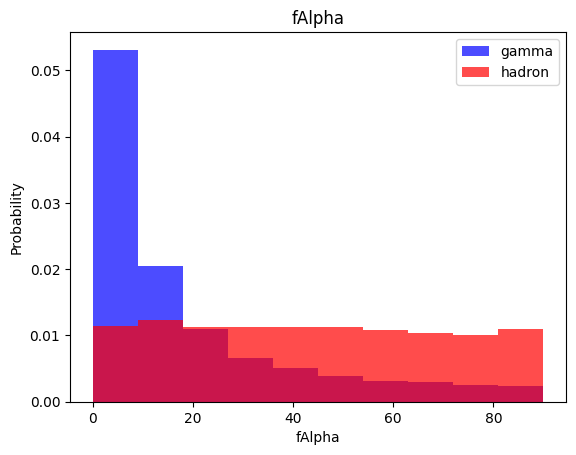

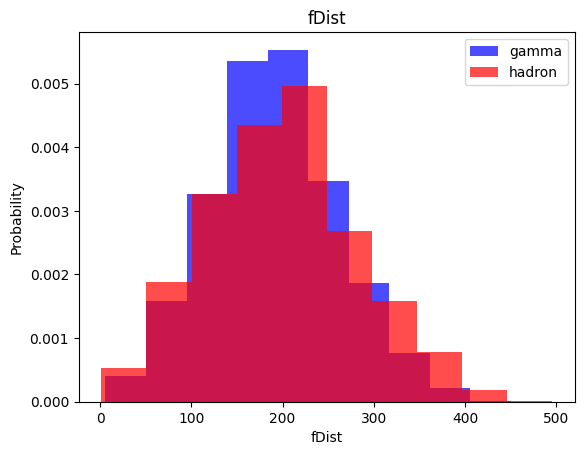

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color = 'blue' , label ='gamma', alpha = 0.7, density = True)
  plt.hist(df[df["class"]==0][label], color = 'red' , label ='hadron', alpha = 0.7, density = True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train , validation , test datasets

In [ ]:
train , valid , test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe , oversample = False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X , np.reshape(y, (-1 ,1))))

  return data , X, y


In [ ]:
train, X_train, y_train  = scale_dataset(train, oversample= True)
valid, X_valid, y_valid  = scale_dataset(valid, oversample= False)
test, X_test, y_test  = scale_dataset(test, oversample= False)

# k - nearest neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1330
           1       0.86      0.86      0.86      2474

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



#Naive Bayes


In [ ]:
from  sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.42      0.51      1330
           1       0.74      0.89      0.81      2474

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.72      0.71      3804



#logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1330
           1       0.84      0.81      0.83      2474

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



#SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1330
           1       0.89      0.89      0.89      2474

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



#Neural Network

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
  ax1.plot(history.history['loss'], label = 'loss')
  ax1.plot(history.history['val_loss'], label = 'val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.legend()
  ax1.grid(True)


  ax2.plot(history.history['accuracy'], label ='accuracy')
  ax2.plot(history.history['val_accuracy'], label= 'val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()




In [ ]:
def train_model(X_test, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation = 'relu' , input_shape =(10 ,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation = 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation = 'sigmoid')
])

  nn_model.compile(optimizer = tf.keras.optimizers.Adam(lr), loss ='binary_crossentropy', metrics = ['accuracy'])

  history = nn_model.fit(X_train, y_train, epochs = epochs, batch_size= batch_size, validation_split = 0.2 , verbose = 0,
                         )
  return nn_model, history

16 nodes, dropout 0 , lr 0.01, batch size 32


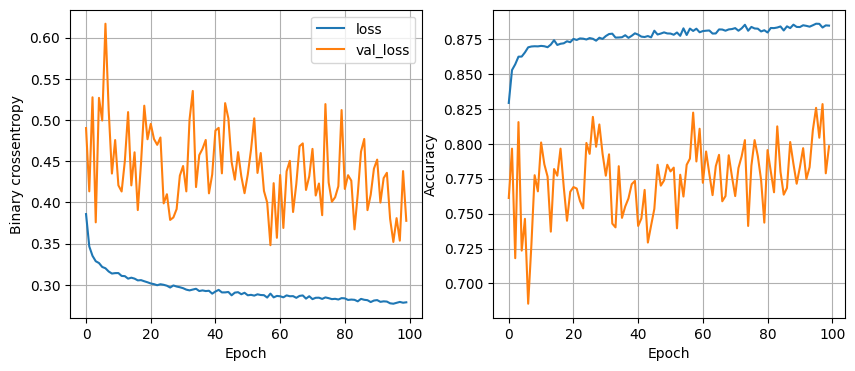

119/119 [==============================] - 0s 2ms/step - loss: 0.3129 - accuracy: 0.8767
16 nodes, dropout 0 , lr 0.01, batch size 64


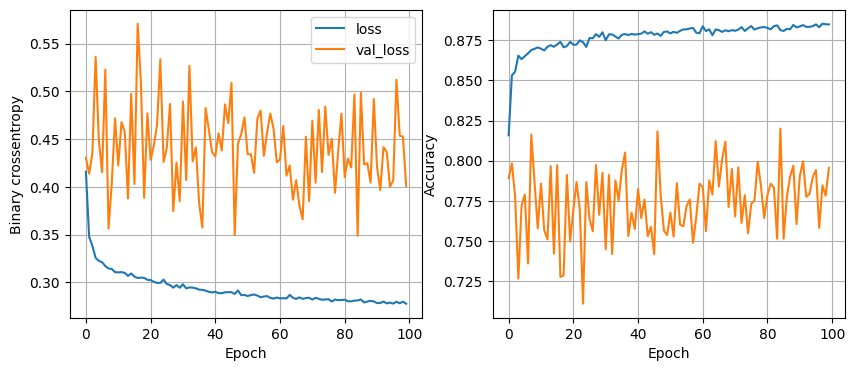

119/119 [==============================] - 0s 2ms/step - loss: 0.3166 - accuracy: 0.8670
16 nodes, dropout 0 , lr 0.01, batch size 128


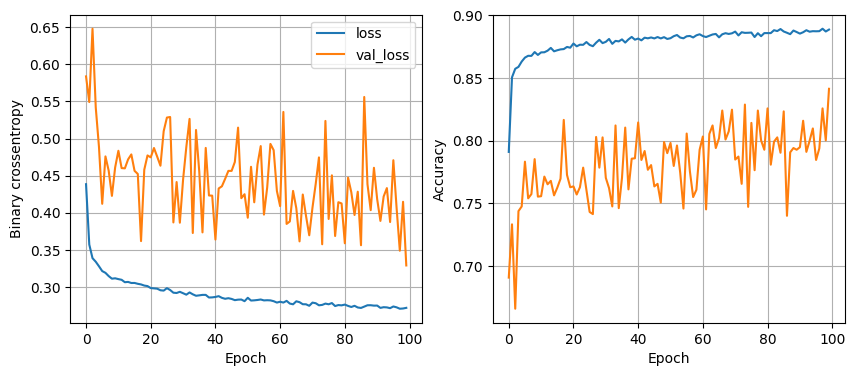

119/119 [==============================] - 0s 2ms/step - loss: 0.3286 - accuracy: 0.8651
16 nodes, dropout 0 , lr 0.05, batch size 32


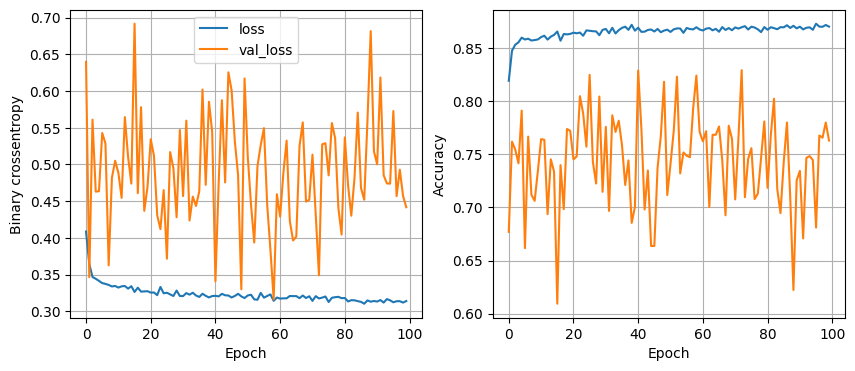

119/119 [==============================] - 0s 2ms/step - loss: 0.3169 - accuracy: 0.8728
16 nodes, dropout 0 , lr 0.05, batch size 64


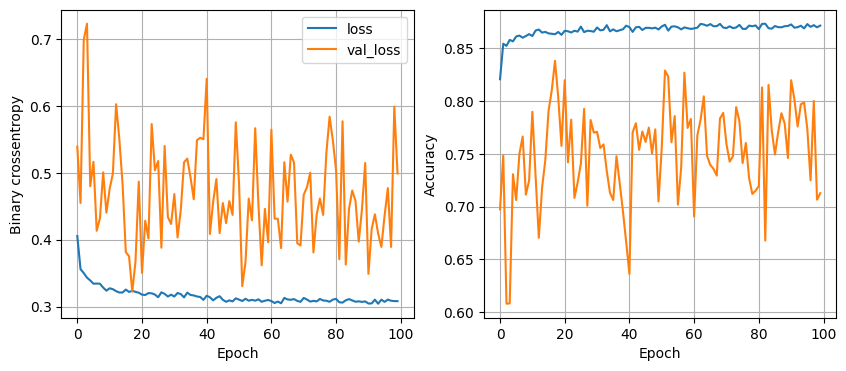

119/119 [==============================] - 0s 2ms/step - loss: 0.3286 - accuracy: 0.8601
16 nodes, dropout 0 , lr 0.05, batch size 128


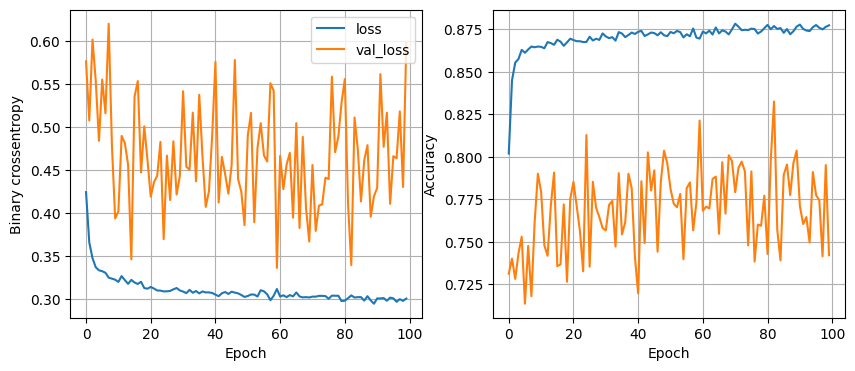

119/119 [==============================] - 0s 2ms/step - loss: 0.3291 - accuracy: 0.8667
16 nodes, dropout 0 , lr 0.001, batch size 32


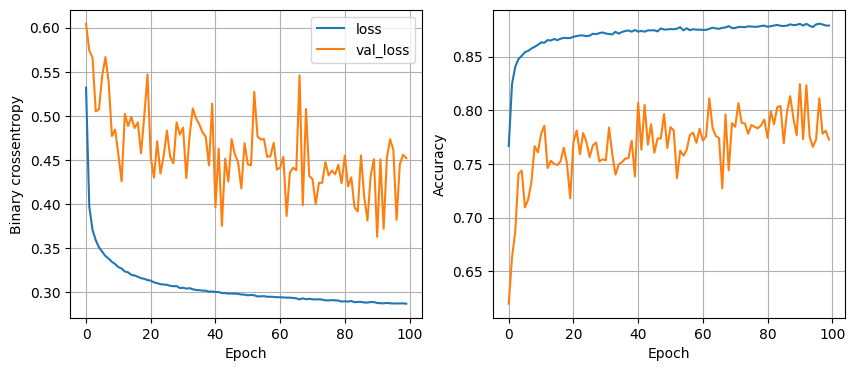

119/119 [==============================] - 1s 2ms/step - loss: 0.3090 - accuracy: 0.8667
16 nodes, dropout 0 , lr 0.001, batch size 64


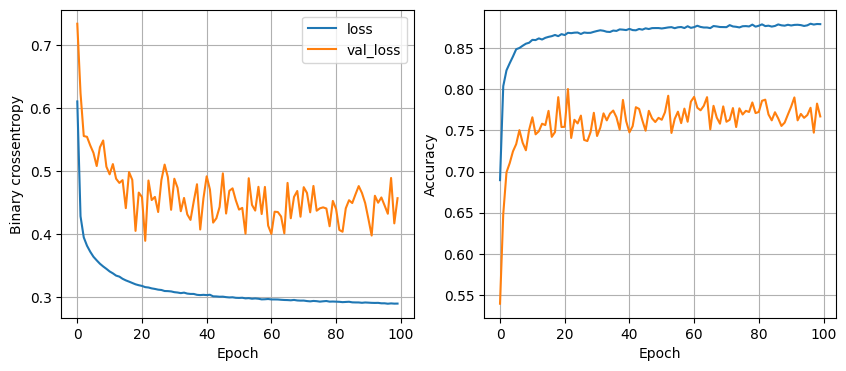

119/119 [==============================] - 0s 2ms/step - loss: 0.3084 - accuracy: 0.8720
16 nodes, dropout 0 , lr 0.001, batch size 128


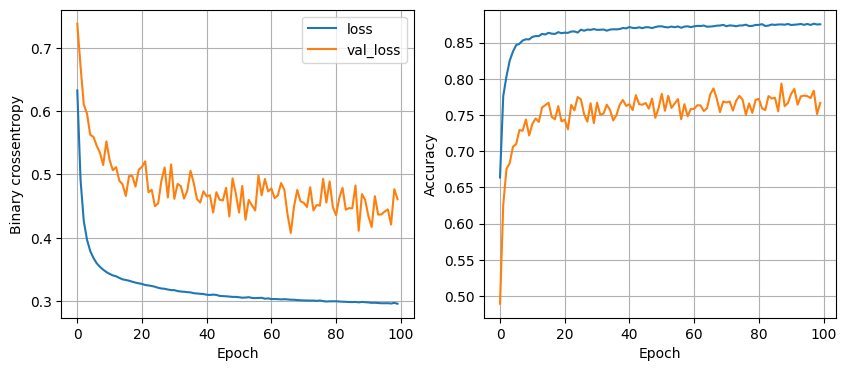

119/119 [==============================] - 0s 2ms/step - loss: 0.3112 - accuracy: 0.8670
16 nodes, dropout 0.2 , lr 0.01, batch size 32


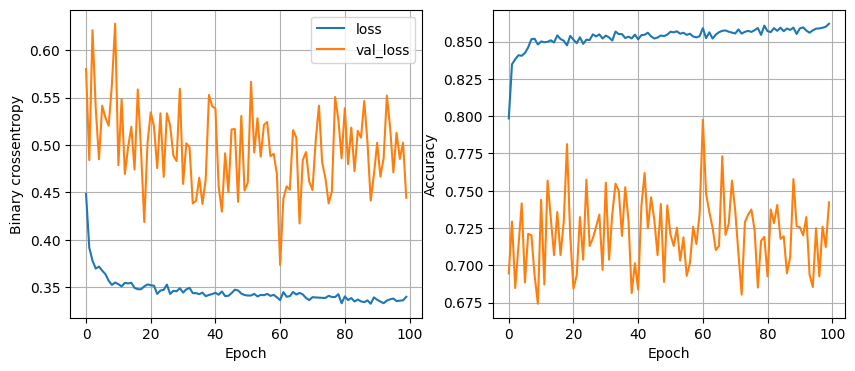

119/119 [==============================] - 0s 2ms/step - loss: 0.3174 - accuracy: 0.8670
16 nodes, dropout 0.2 , lr 0.01, batch size 64


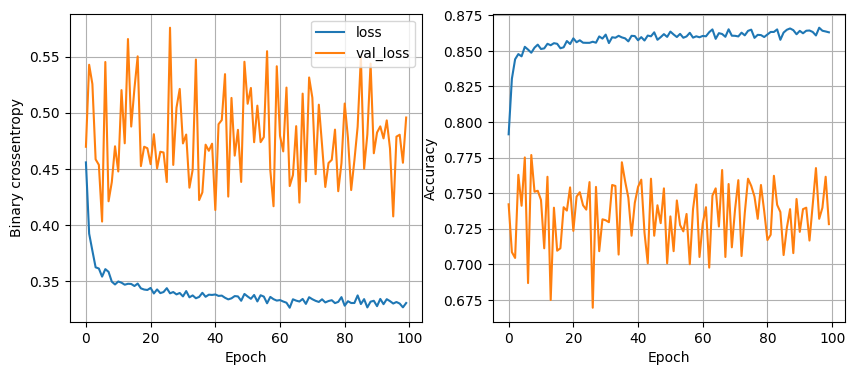

119/119 [==============================] - 0s 2ms/step - loss: 0.3079 - accuracy: 0.8712
16 nodes, dropout 0.2 , lr 0.01, batch size 128


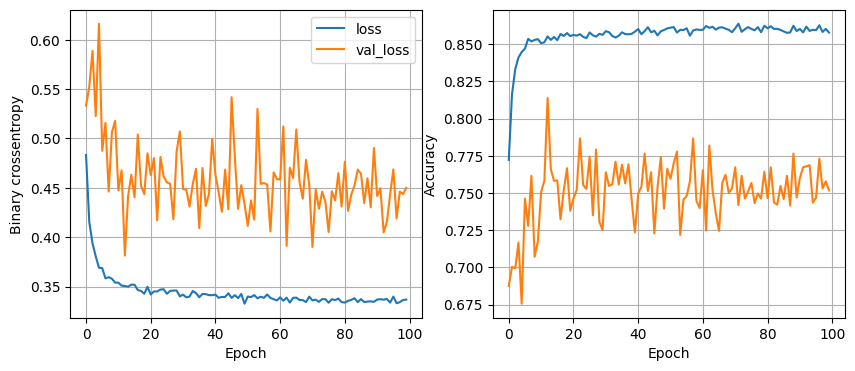

119/119 [==============================] - 0s 2ms/step - loss: 0.3127 - accuracy: 0.8699
16 nodes, dropout 0.2 , lr 0.05, batch size 32


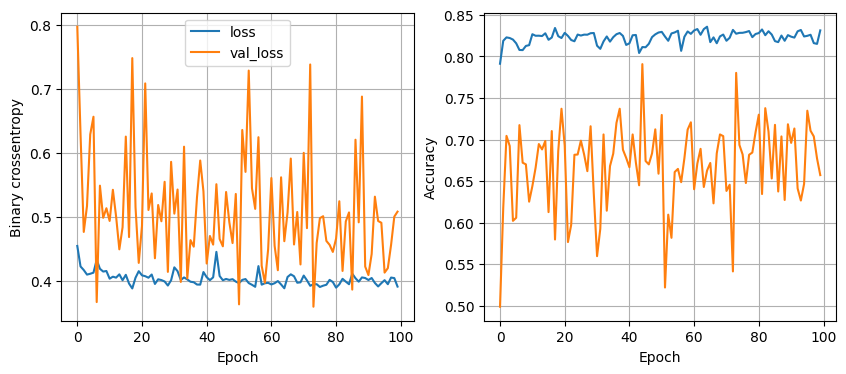

119/119 [==============================] - 0s 2ms/step - loss: 0.3680 - accuracy: 0.8470
16 nodes, dropout 0.2 , lr 0.05, batch size 64


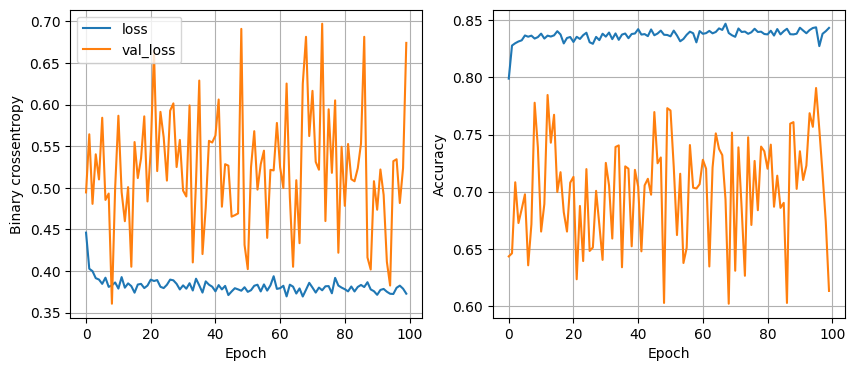

119/119 [==============================] - 0s 2ms/step - loss: 0.3558 - accuracy: 0.8467
16 nodes, dropout 0.2 , lr 0.05, batch size 128


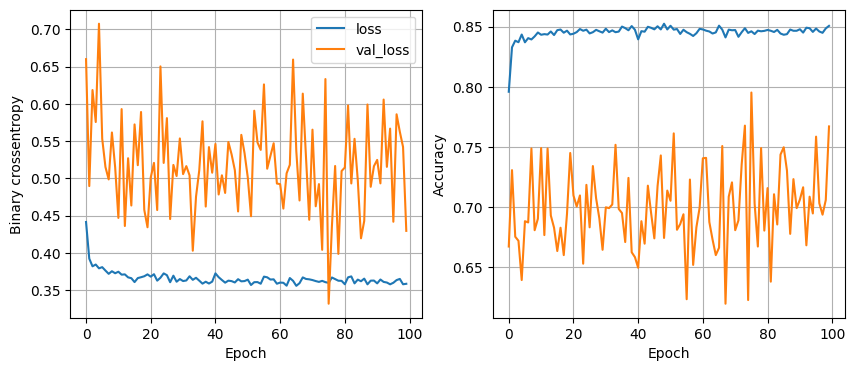

119/119 [==============================] - 0s 2ms/step - loss: 0.3381 - accuracy: 0.8654
16 nodes, dropout 0.2 , lr 0.001, batch size 32


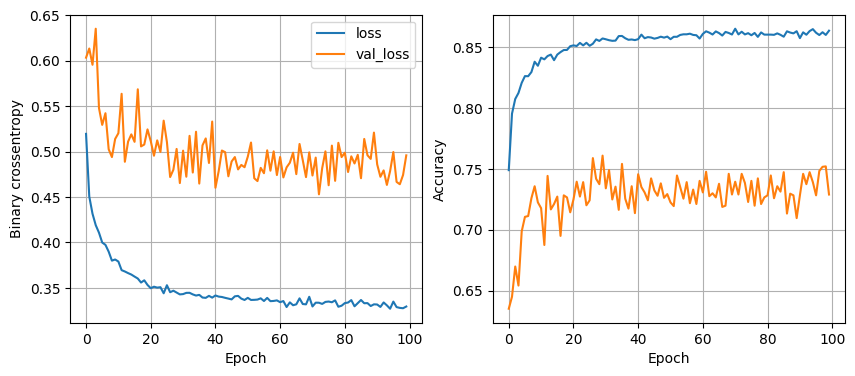

119/119 [==============================] - 0s 2ms/step - loss: 0.3104 - accuracy: 0.8665
16 nodes, dropout 0.2 , lr 0.001, batch size 64


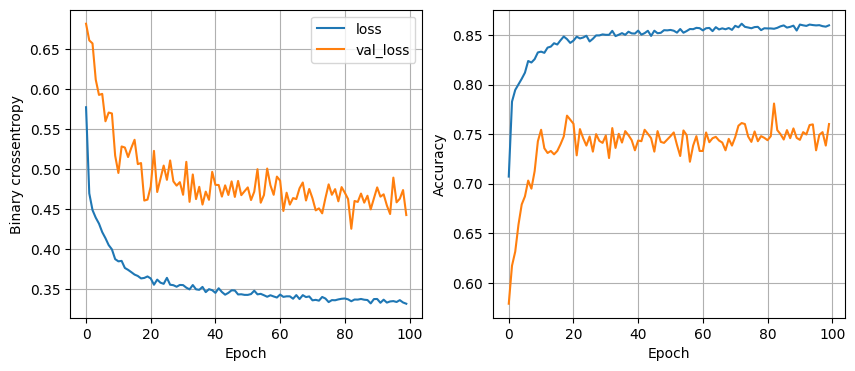

119/119 [==============================] - 0s 2ms/step - loss: 0.3116 - accuracy: 0.8696
16 nodes, dropout 0.2 , lr 0.001, batch size 128


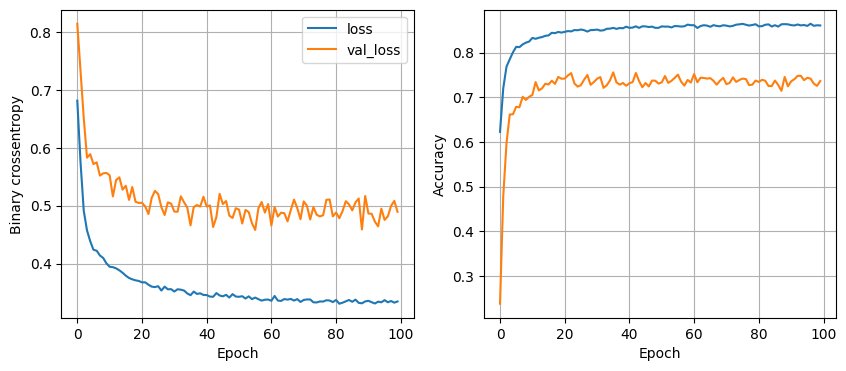

119/119 [==============================] - 1s 3ms/step - loss: 0.3106 - accuracy: 0.8696
32 nodes, dropout 0 , lr 0.01, batch size 32


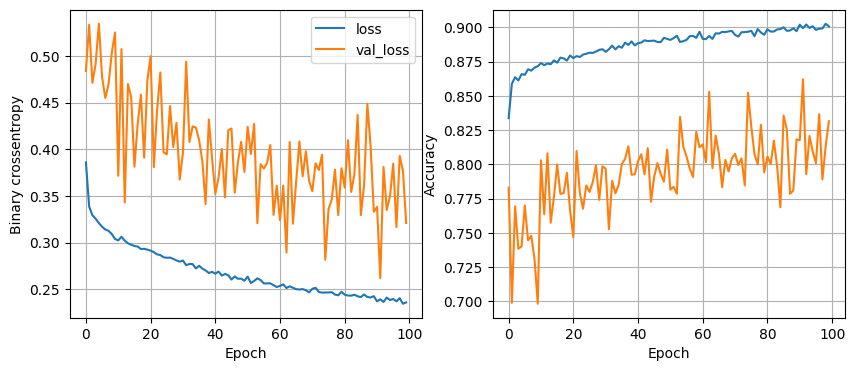

119/119 [==============================] - 0s 2ms/step - loss: 0.3583 - accuracy: 0.8672
32 nodes, dropout 0 , lr 0.01, batch size 64


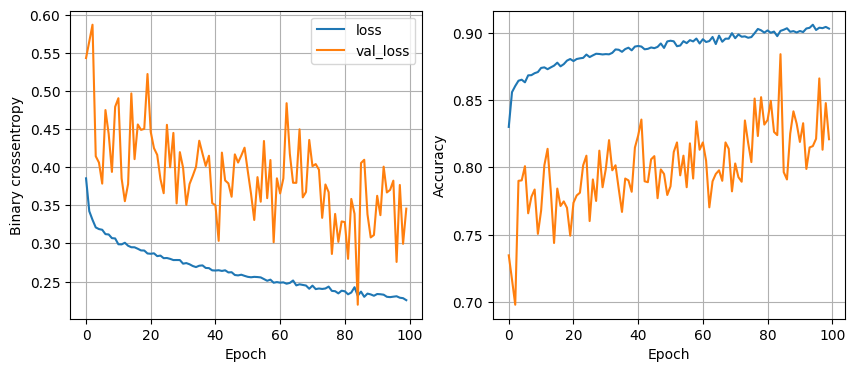

119/119 [==============================] - 0s 2ms/step - loss: 0.3711 - accuracy: 0.8683
32 nodes, dropout 0 , lr 0.01, batch size 128


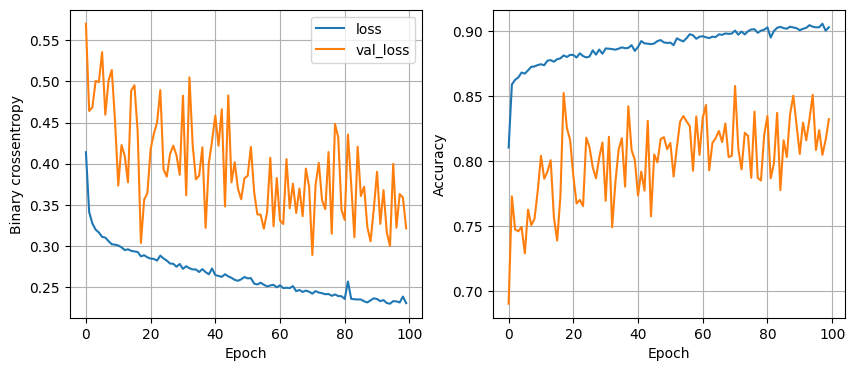

119/119 [==============================] - 0s 2ms/step - loss: 0.3622 - accuracy: 0.8701
32 nodes, dropout 0 , lr 0.05, batch size 32


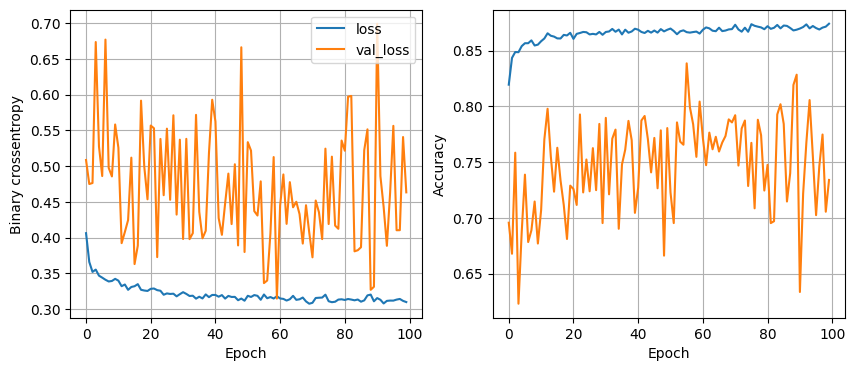

119/119 [==============================] - 0s 2ms/step - loss: 0.3294 - accuracy: 0.8672
32 nodes, dropout 0 , lr 0.05, batch size 64


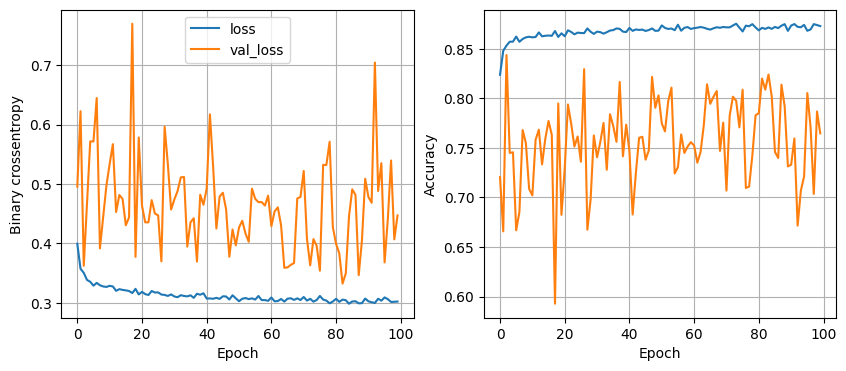

119/119 [==============================] - 0s 2ms/step - loss: 0.3201 - accuracy: 0.8678
32 nodes, dropout 0 , lr 0.05, batch size 128


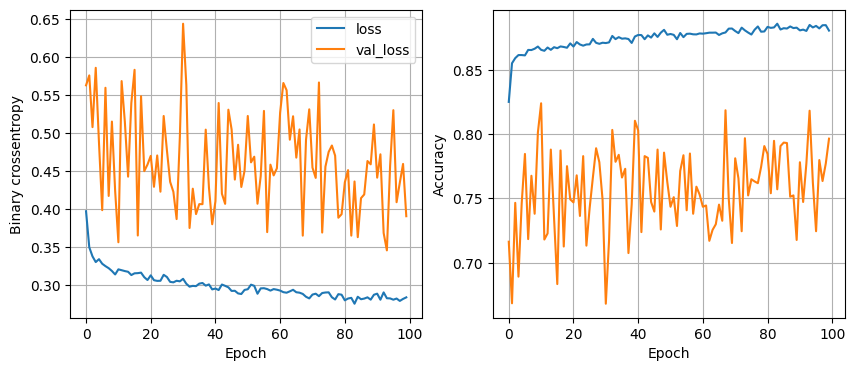

119/119 [==============================] - 1s 3ms/step - loss: 0.3311 - accuracy: 0.8730
32 nodes, dropout 0 , lr 0.001, batch size 32


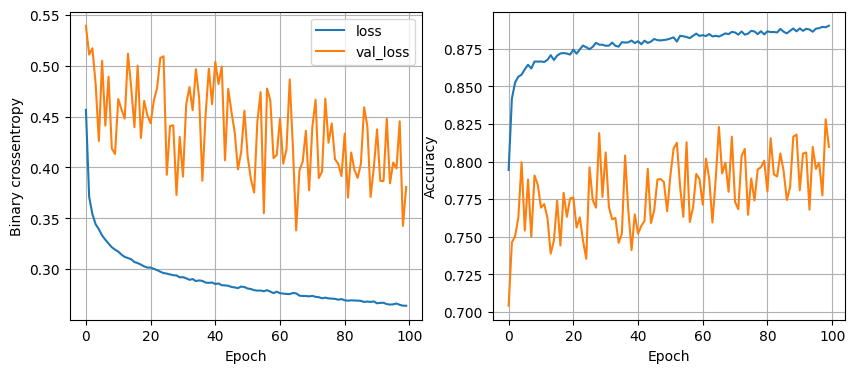

119/119 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8683
32 nodes, dropout 0 , lr 0.001, batch size 64


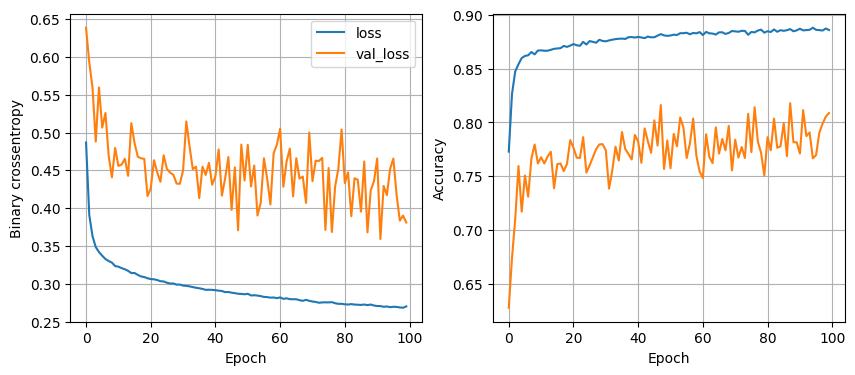

119/119 [==============================] - 0s 2ms/step - loss: 0.3092 - accuracy: 0.8701
32 nodes, dropout 0 , lr 0.001, batch size 128


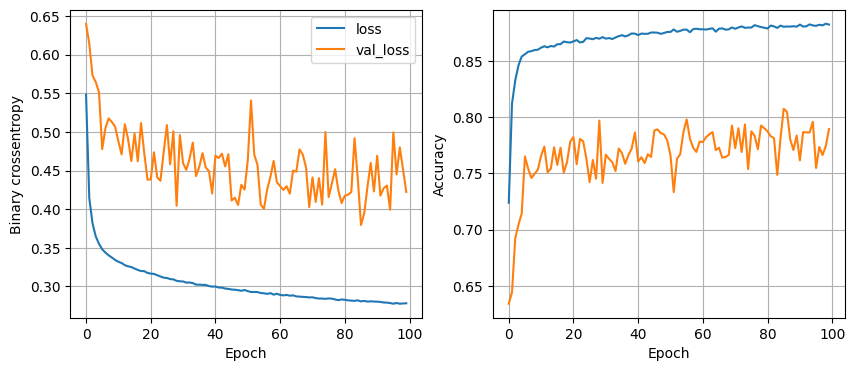

119/119 [==============================] - 0s 2ms/step - loss: 0.3011 - accuracy: 0.8751
32 nodes, dropout 0.2 , lr 0.01, batch size 32


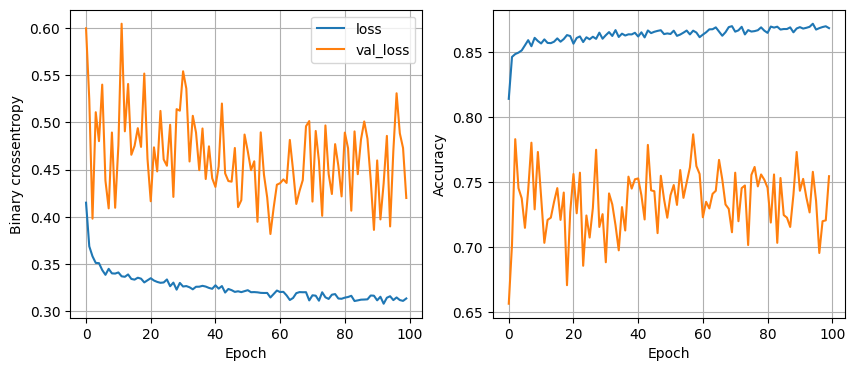

119/119 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8717
32 nodes, dropout 0.2 , lr 0.01, batch size 64


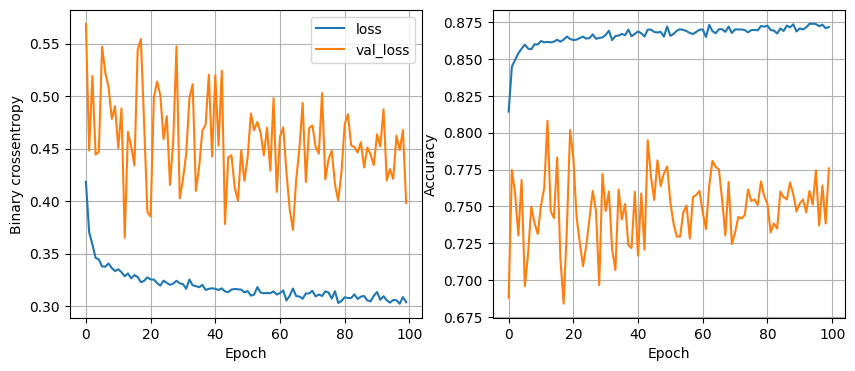

119/119 [==============================] - 0s 2ms/step - loss: 0.3023 - accuracy: 0.8778
32 nodes, dropout 0.2 , lr 0.01, batch size 128


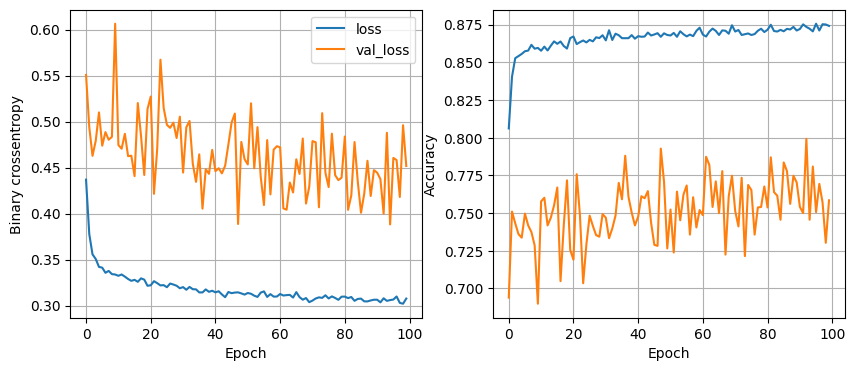

119/119 [==============================] - 1s 3ms/step - loss: 0.2953 - accuracy: 0.8788
32 nodes, dropout 0.2 , lr 0.05, batch size 32


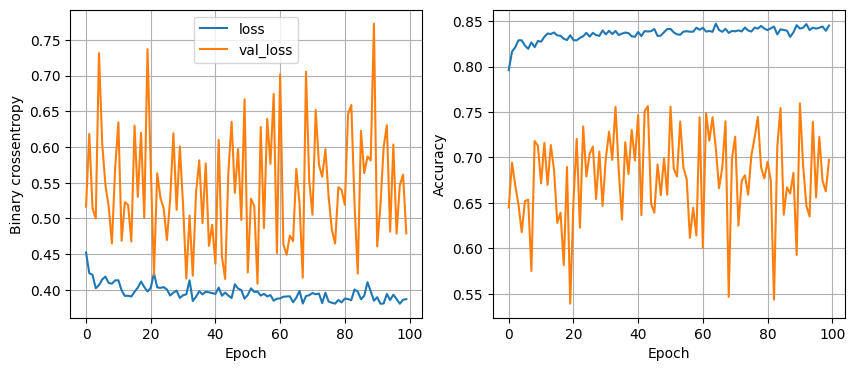

119/119 [==============================] - 0s 2ms/step - loss: 0.3790 - accuracy: 0.8549
32 nodes, dropout 0.2 , lr 0.05, batch size 64


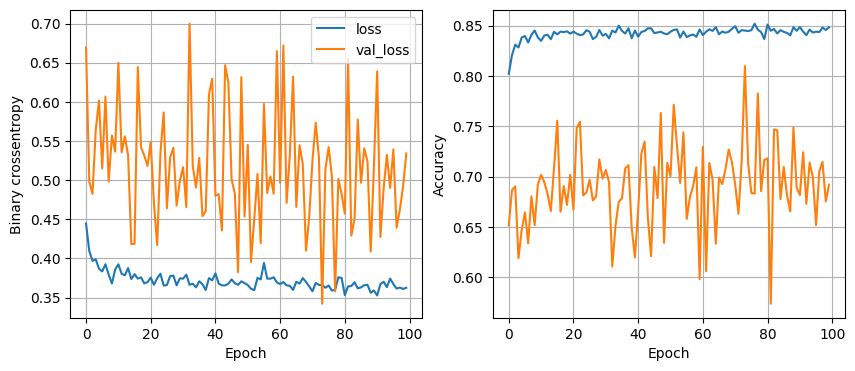

119/119 [==============================] - 0s 2ms/step - loss: 0.3298 - accuracy: 0.8599
32 nodes, dropout 0.2 , lr 0.05, batch size 128


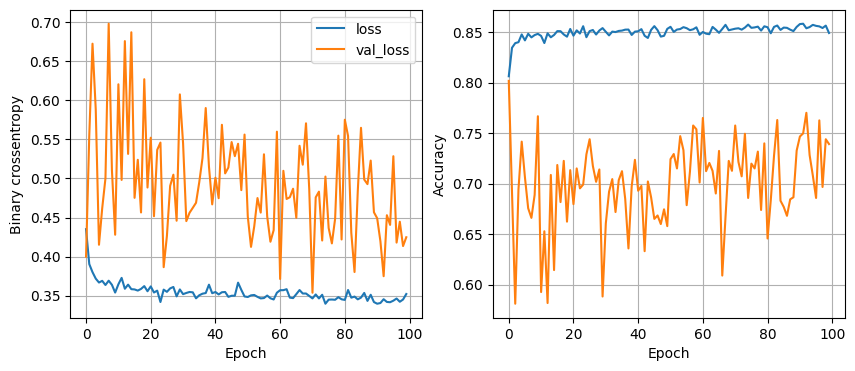

119/119 [==============================] - 0s 2ms/step - loss: 0.3265 - accuracy: 0.8651
32 nodes, dropout 0.2 , lr 0.001, batch size 32


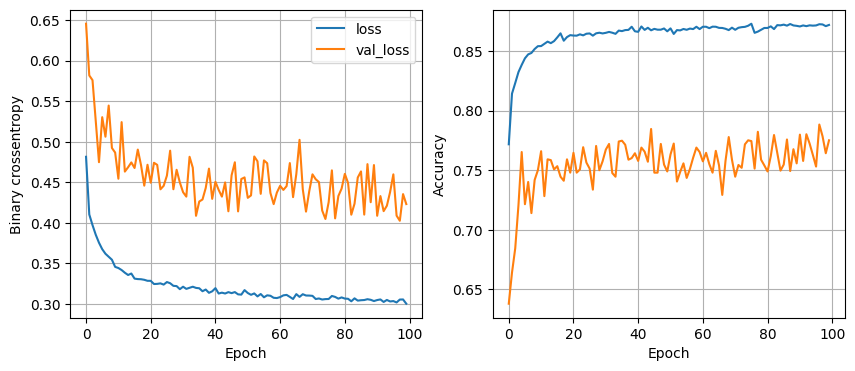

119/119 [==============================] - 0s 2ms/step - loss: 0.2963 - accuracy: 0.8793
32 nodes, dropout 0.2 , lr 0.001, batch size 64


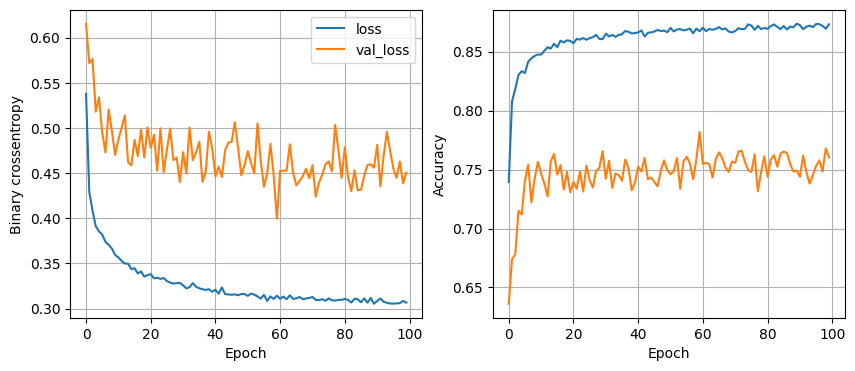

119/119 [==============================] - 0s 2ms/step - loss: 0.2940 - accuracy: 0.8749
32 nodes, dropout 0.2 , lr 0.001, batch size 128


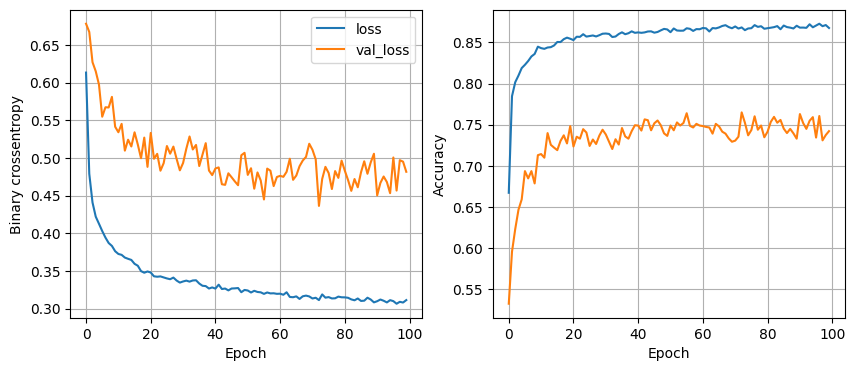

119/119 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 0.8693
64 nodes, dropout 0 , lr 0.01, batch size 32


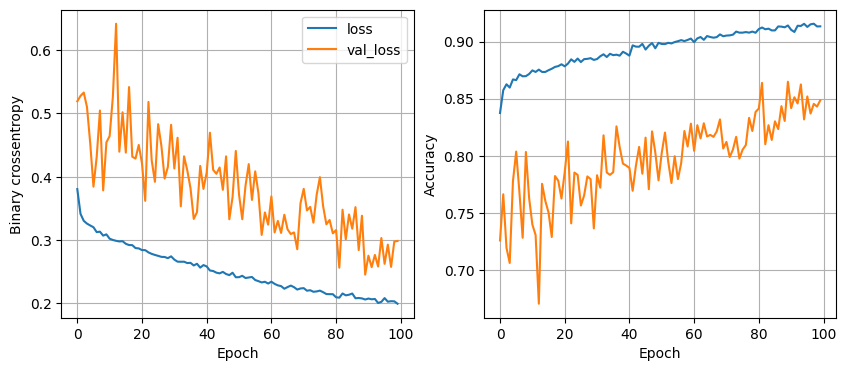

119/119 [==============================] - 0s 2ms/step - loss: 0.4919 - accuracy: 0.8657
64 nodes, dropout 0 , lr 0.01, batch size 64


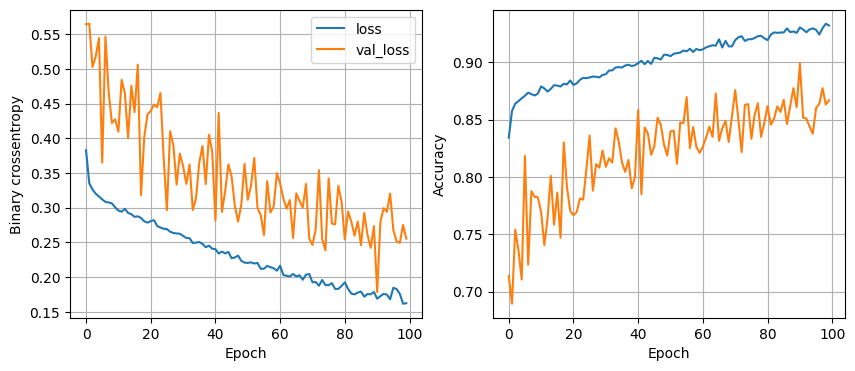

119/119 [==============================] - 0s 2ms/step - loss: 0.5797 - accuracy: 0.8617
64 nodes, dropout 0 , lr 0.01, batch size 128


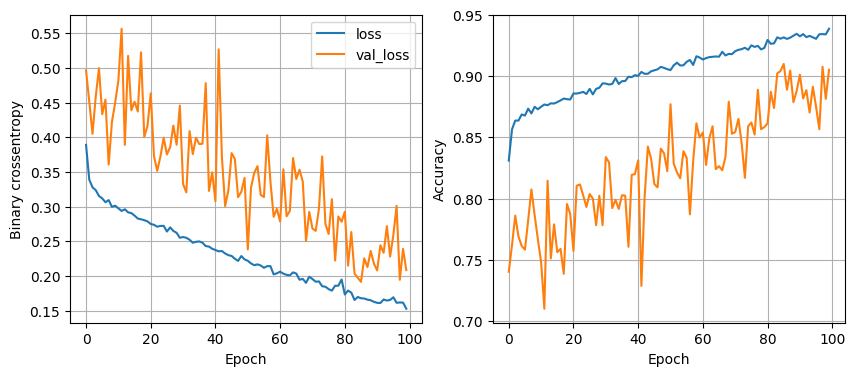

119/119 [==============================] - 0s 2ms/step - loss: 0.5298 - accuracy: 0.8654
64 nodes, dropout 0 , lr 0.05, batch size 32


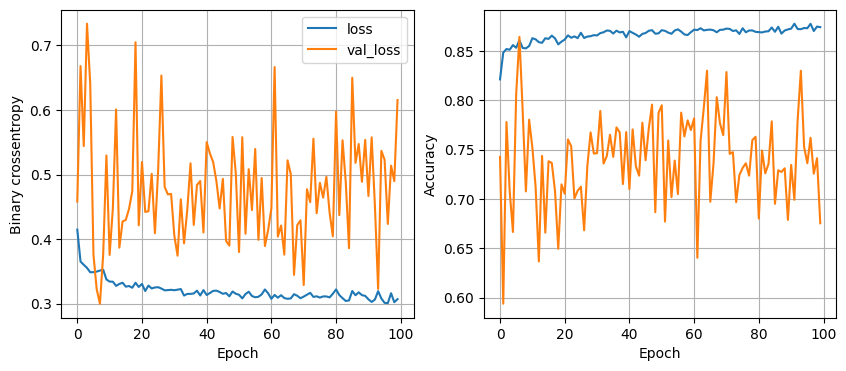

119/119 [==============================] - 0s 2ms/step - loss: 0.3587 - accuracy: 0.8628
64 nodes, dropout 0 , lr 0.05, batch size 64


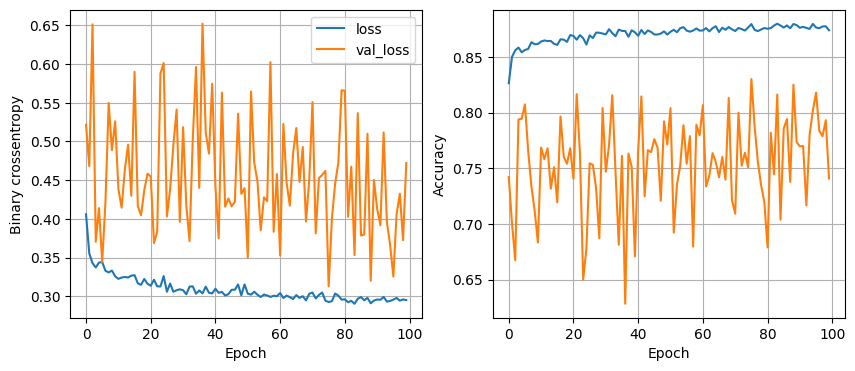

119/119 [==============================] - 0s 2ms/step - loss: 0.3394 - accuracy: 0.8604
64 nodes, dropout 0 , lr 0.05, batch size 128


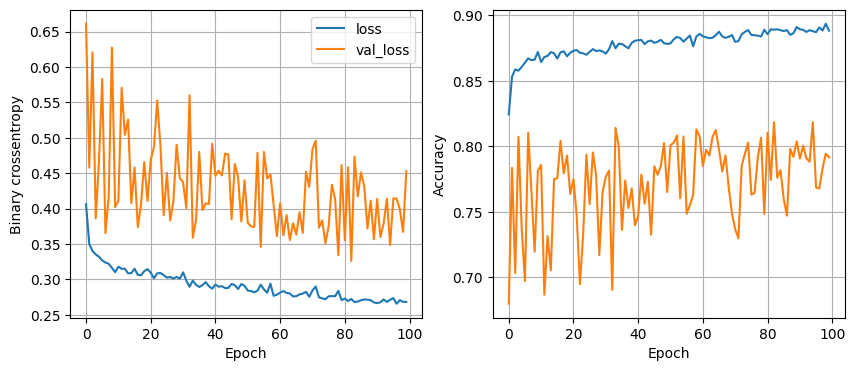

119/119 [==============================] - 0s 2ms/step - loss: 0.3619 - accuracy: 0.8707
64 nodes, dropout 0 , lr 0.001, batch size 32


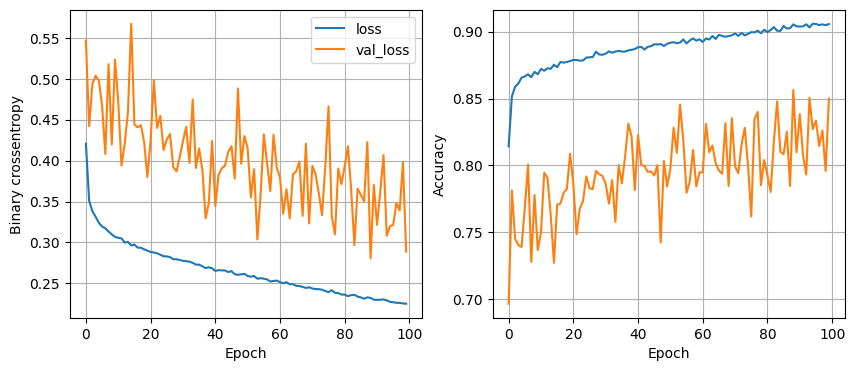

119/119 [==============================] - 1s 3ms/step - loss: 0.3343 - accuracy: 0.8743
64 nodes, dropout 0 , lr 0.001, batch size 64


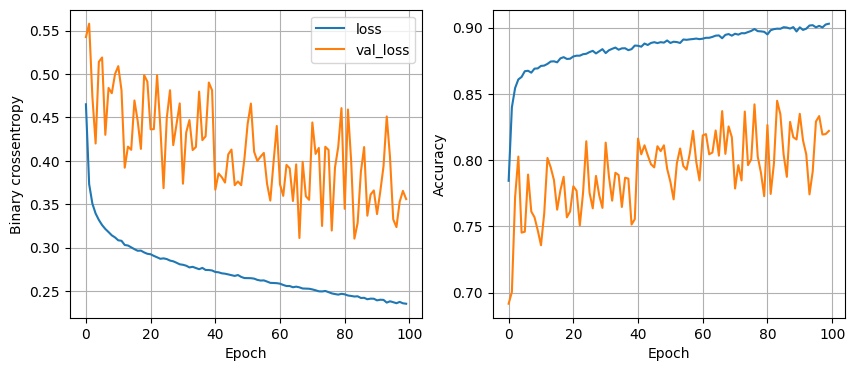

119/119 [==============================] - 1s 3ms/step - loss: 0.3081 - accuracy: 0.8796
64 nodes, dropout 0 , lr 0.001, batch size 128


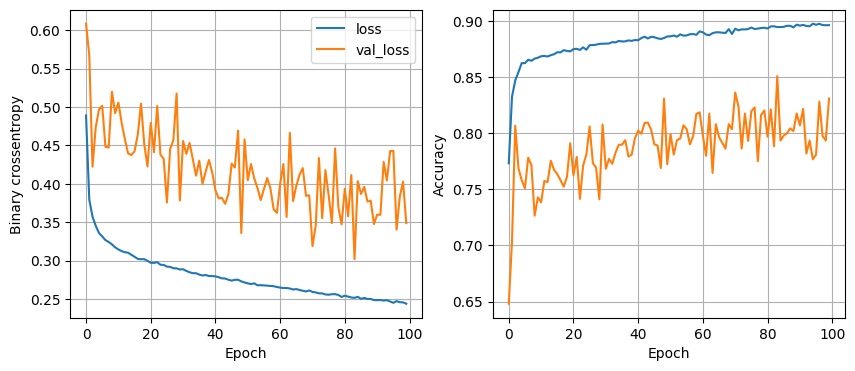

119/119 [==============================] - 0s 3ms/step - loss: 0.3057 - accuracy: 0.8767
64 nodes, dropout 0.2 , lr 0.01, batch size 32


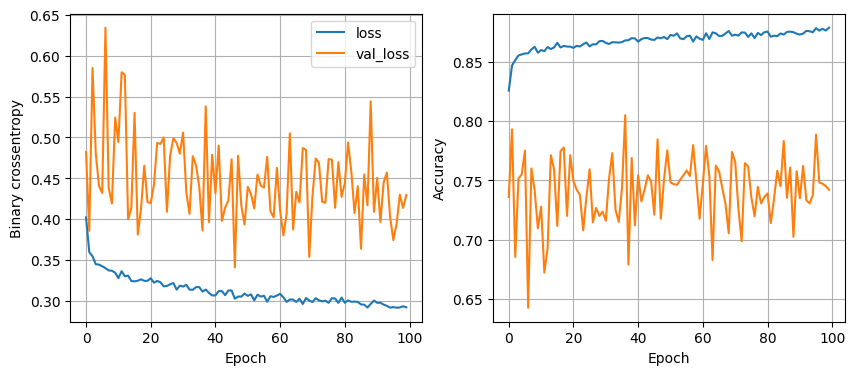

119/119 [==============================] - 0s 2ms/step - loss: 0.3036 - accuracy: 0.8733
64 nodes, dropout 0.2 , lr 0.01, batch size 64


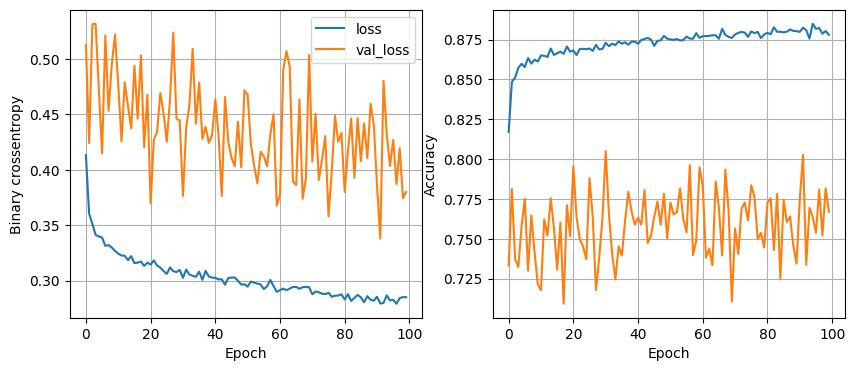

119/119 [==============================] - 0s 2ms/step - loss: 0.3008 - accuracy: 0.8817
64 nodes, dropout 0.2 , lr 0.01, batch size 128


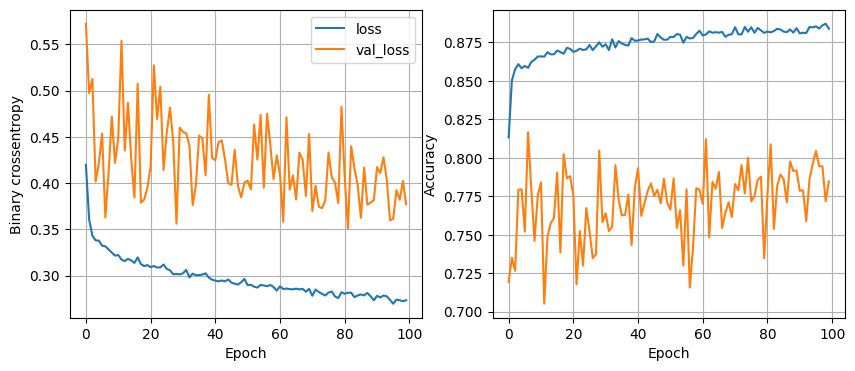

119/119 [==============================] - 0s 2ms/step - loss: 0.2989 - accuracy: 0.8809
64 nodes, dropout 0.2 , lr 0.05, batch size 32


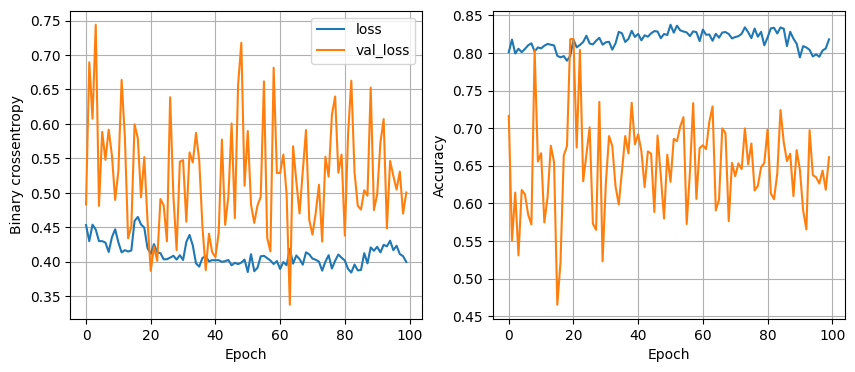

119/119 [==============================] - 0s 2ms/step - loss: 0.3775 - accuracy: 0.8520
64 nodes, dropout 0.2 , lr 0.05, batch size 64


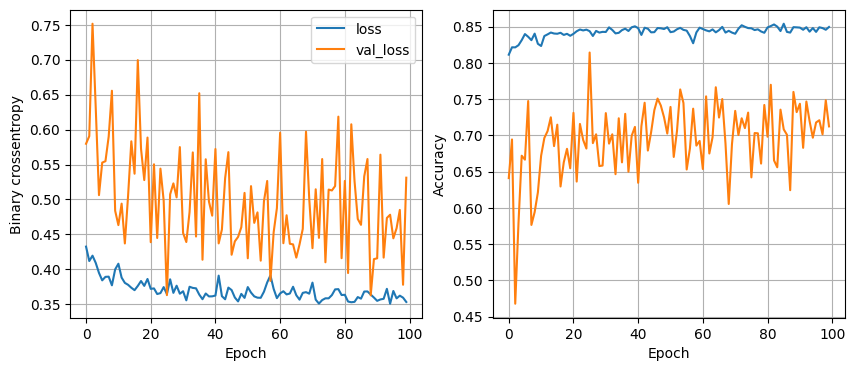

119/119 [==============================] - 0s 2ms/step - loss: 0.3266 - accuracy: 0.8659
64 nodes, dropout 0.2 , lr 0.05, batch size 128


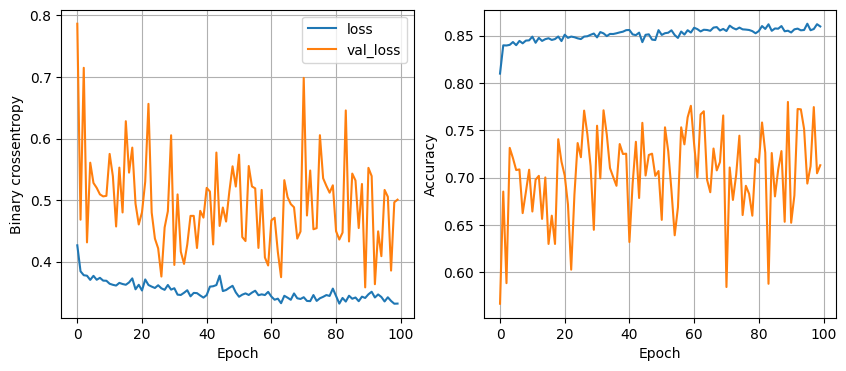

119/119 [==============================] - 1s 2ms/step - loss: 0.3206 - accuracy: 0.8680
64 nodes, dropout 0.2 , lr 0.001, batch size 32


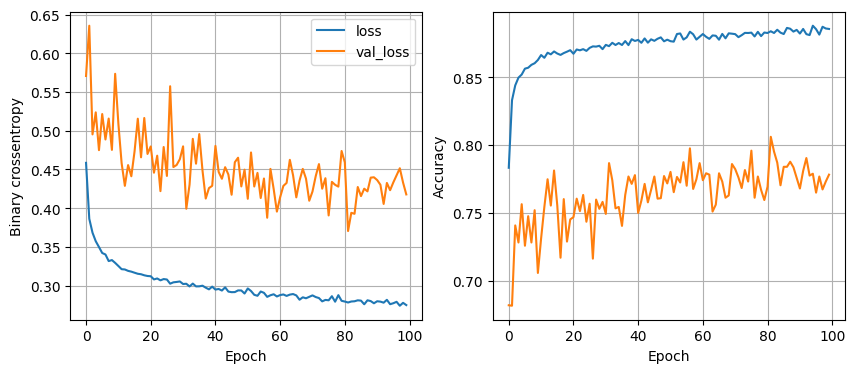

119/119 [==============================] - 1s 2ms/step - loss: 0.2863 - accuracy: 0.8783
64 nodes, dropout 0.2 , lr 0.001, batch size 64


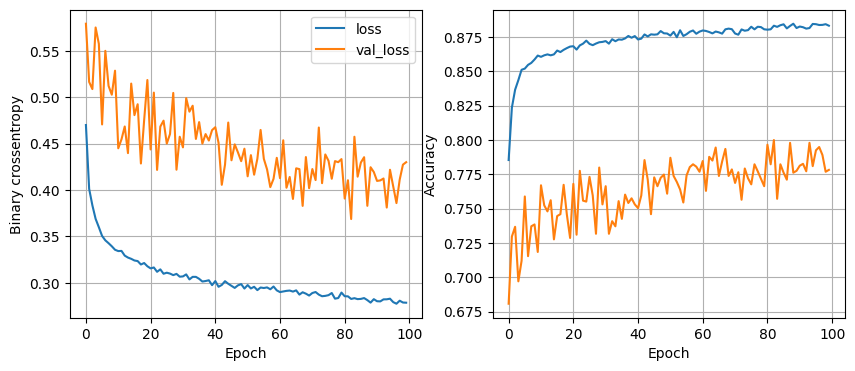

119/119 [==============================] - 0s 2ms/step - loss: 0.2902 - accuracy: 0.8770
64 nodes, dropout 0.2 , lr 0.001, batch size 128


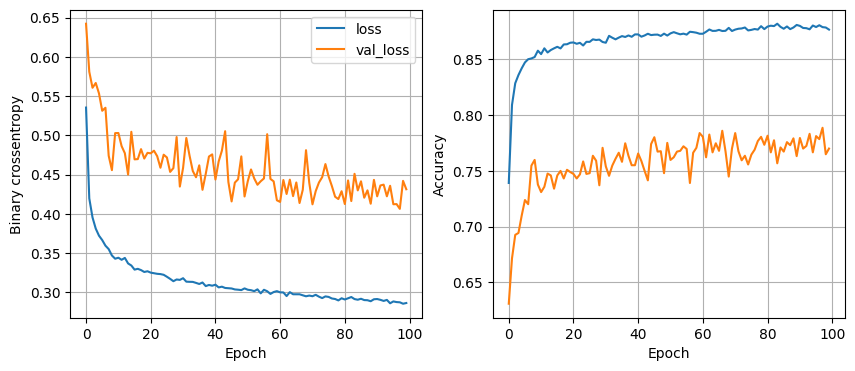

119/119 [==============================] - 0s 2ms/step - loss: 0.2917 - accuracy: 0.8743


In [ ]:
least_val_loss = float('inf')
leat_loss_model = None
epochs =100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.05, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob} , lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss= model.evaluate(X_valid, y_valid)[0]

        if val_loss < least_val_loss:
          least_val_loss =val_loss
          leat_loss_model = model



In [ ]:
y_pred = leat_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 1s 5ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1330
           1       0.87      0.94      0.90      2474

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804

